In [45]:
import gpflow
import numpy as np
from src.utils import create_dataset, plot_matrix, plot_matrix_cv
from sklearn.model_selection import KFold
from src.models.kernels import LambdaRBF, ARD_gpflow
from src.models.models import GPRLasso
from src.models.validation import measure_mnll, measure_rmse, kfold_cv_model

## Dataset: Boston

In [46]:
lasso = 1
dataset = 'boston'

In [47]:
X, Y = create_dataset(dataset, 0, False)
D = X.shape[1]
kfolds = KFold(n_splits = 8, shuffle=True, random_state=0)

In [48]:
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': lasso, 'tol_sparsity': 0.1}
results_GPR_LRBF = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='LRBF', k_folds=kfolds, model_params=model_params, iprint=True)

-- Model: GPR-Lasso; Kernel: LRBF; --
Average test RMSE: 0.375
Average test MNLL: 7.245



In [49]:
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': lasso, 'tol_sparsity': 0.1}
results_GPR_RBF_ARD = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='RBF-ARD', k_folds=kfolds, model_params=model_params, iprint=True)

-- Model: GPR-Lasso; Kernel: RBF-ARD; --
Average test RMSE: 0.302
Average test MNLL: 3.556



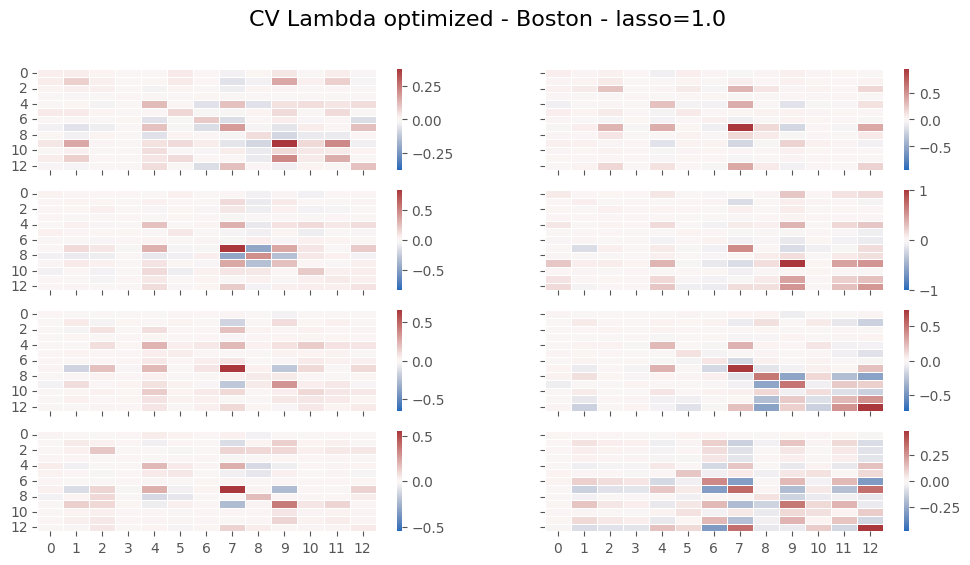

In [50]:
plot_matrix_cv(results_GPR_LRBF['Lambda'], info={'dataset':'Boston', 'lasso':model_params['lasso']})

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.L,Parameter,Identity,,True,"(91,)",float64,"[0.27735, 0., 0...."
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


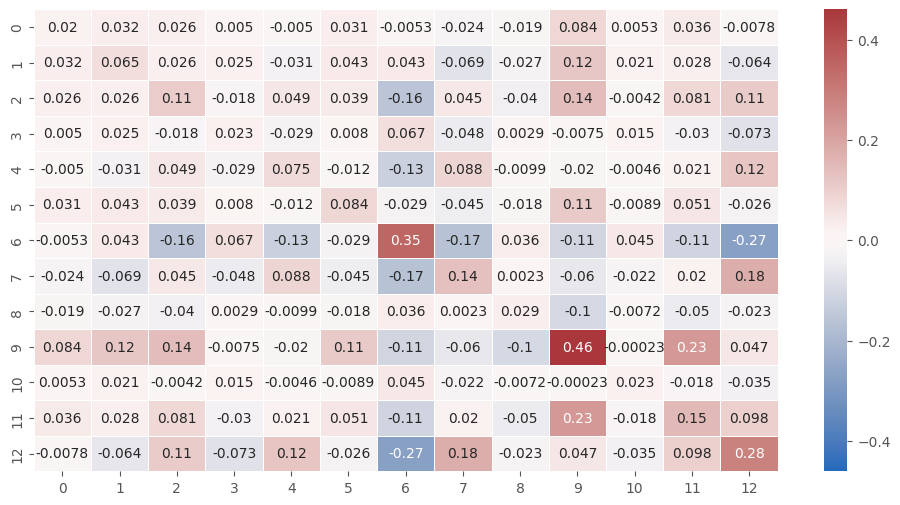

In [51]:
LRBF = LambdaRBF(variance=1.0, randomized=False, d=D)
gpr_lasso_LRBF = GPRLasso(data=(X, Y), kernel=LRBF, lasso=lasso)
gpflow.utilities.print_summary(gpr_lasso_LRBF, fmt="notebook")
gpr_lasso_LRBF.train()
plot_matrix(gpr_lasso_LRBF.kernel.precision())

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.kernel.lengthscales,Parameter,Softplus,,True,"(13,)",float64,"[3.60555, 3.60555, 3.60555..."
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


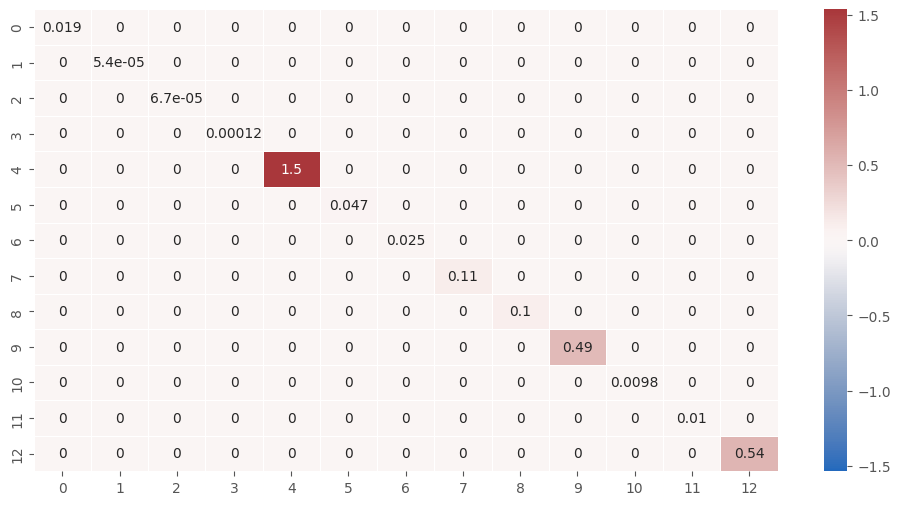

In [52]:
RBF_ARD = ARD_gpflow(variance=1.0, randomized=False, d=D)
gpr_lasso_RBF_ARD = GPRLasso(data=(X, Y), kernel=RBF_ARD, lasso=0)
gpflow.utilities.print_summary(gpr_lasso_RBF_ARD, fmt="notebook")
gpr_lasso_RBF_ARD.train()
plot_matrix(gpr_lasso_RBF_ARD.kernel.precision())